

# Project: Investigate a Dataset - [TMDb Movie Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This project explores a dataset containing information about 5000 movies collected from The Movie Database (TMDb). The dataset includes various attributes of the movies such as their budget, revenue,user ratings, popularity,genres and more.

We also have a second table containing additional information about movies("credits table"), such as title, cast, and crew, linked to the main table by the movie_id. 


### Relationship Between Tables

The relationship between the main table (tmdb-movies) and the secondary table (movie-details) is based on a one-to-one relationship using the id column from the main table and the movie_id column from the secondary table. This relationship allows us to merge the two tables to incorporate additional details 
such as cast and crew into our analysis.


### Column Names and Their Significance
#### Main Table (tmdb-movies) Columns:

<li>budget: The budget of the movie.</li>
<li>genres: The genres of the movie.</li>
<li>homepage: The homepage URL of the movie.</li>
<li>id: The unique identifier for the movie (primary key).</li>
<li>keywords: Keywords associated with the movie, separated by pipe (|) characters.</li>
<li>original_language: The original language of the movie.</li>
<li>original_title: The original title of the movie.</li>
<li>overview: A brief description of the movie.</li>
<li>popularity: The popularity score of the movie.</li>
<li>production_companies: The production companies involved in making the movie, separated by pipe (|) characters.</li>
<li>production_countries: The countries where the movie was produced, separated by pipe (|) characters.</li>
<li>release_date: The release date of the movie.</li>
<li>revenue: The revenue of the movie.</li>
<li>runtime: The runtime of the movie in minutes.</li>
<li>spoken_languages: The languages spoken in the movie, separated by pipe (|) characters.</li>
<li>status: The release status of the movie (e.g., Released).</li>
<li>tagline: The tagline of the movie.</li>
<li>title: The title of the movie.</li>
<li>vote_average: The average vote rating of the movie.</li>
<li>vote_count: The number of votes the movie has received.</li>

####
Secondary Table (movie-details) Columns:

<li>movie_id: The unique identifier for the movie (foreign key linking to id in the main table).</li>
<li>title: The title of the movie.</li>
<li>cast: The cast of the movie, separated by pipe (|) characters.</li>
<li>crew: The crew of the movie, separated by pipe (|) characters.</li>



### Question(s) for Analysis

The primary questions we aim to answer in this analysis are:
1. Which genres are most popular from year to year?
2. How does the budget of a movie relate to its revenue?
3. What is the relationship between spoken languages and popularity?







<a id='wrangling'></a>
## Data Wrangling


### Importing libraries and Loading data 

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
main_df = pd.read_csv("tmdb_5000_movies.csv")
details_df  = pd.read_csv("tmdb_5000_credits.csv")

### General Properties
#### Properties for the first dataset (movies)

Our first table contains 4803 rows and 20 columns

In [3]:
# exploring data
main_df.shape

(4803, 20)

lets see the main table info and the first few rows

In [4]:
print(main_df.info())
main_df.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106


now lets see some more details about this table

In [5]:
main_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


#### Properties for the second dataset(credits)

lets do the same for this secondery table

Our second table contains 4803 rows and  only 4 columns

In [6]:
details_df.shape

(4803, 4)

In [7]:
print(details_df.info())
details_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB
None


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


we don't need to see the description of this table because all the datatypes of its colounms are strings(objects)

## Merging the two datasets

after auditing in the two tables we found that we have a foreign key from the main table which is the primary key of the second table and that key is "id" or "movie_id"
so, we can merge these two tables according to this key

In [8]:
# Merge the two dataframes on the id and movie_id columns
merged_df = pd.merge(main_df, details_df, left_on='id', right_on='movie_id')
merged_df.shape

(4803, 24)

we can notice that all the id's from the main table are the same as the movie_id from the second table because the number of rows in the new merged table is 4803 (same as the two tables)

Now lets see the details of our new table

In [9]:
print(merged_df.info())
# Display the first few rows of the merged dataframe
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [10]:
merged_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989,57165.484281
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891,88694.614033
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000,9014.500000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,14629.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000,58610.500000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,459488.000000


** notice how the values of the 'runtime' and 'vote_average' are small

Now after we understood what our dataset have inside, its the time to start cleaning it and getting it ready to get answers for the questions



# Data Cleaning

#### First thing lets check for missing values

In [11]:
merged_df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
movie_id                   0
title_y                    0
cast                       0
crew                       0
dtype: int64

### Drop Columns with a High Proportion of Missing Values:


We can notice that homepage has 3091 missing values out of 4803 (about 64% missing), and tagline has 844 missing values out of 4803 (about 18% missing).

Since homepage and tagline columns have a very high proportion of missing values and they are not needed for our investigation, we should drop these columns.

In [12]:
# Drop columns with a high proportion of missing values
merged_df.drop(columns=['homepage', 'tagline'], inplace=True)

### Drop the columns that will not be used

some columns like keywords,production_companies,crew,cast... etc won't be used to answer our question so we can drop them.

other columns are repeated from another ones like movie_id from id (After merging) so we can drop it

we can also drop title_x and title_y and replace them with one column called title(after checking that they are the same)

In [13]:
merged_df.drop(columns=['keywords', 'production_companies','crew','cast','movie_id'], inplace=True)

In [14]:
all_values_same = (merged_df['title_x'] == merged_df['title_y']).all()
print(all_values_same)

True


because it is true we can now drop these two columns and put another one insted of them called title

In [15]:
merged_df['title'] = merged_df['title_x']

In [16]:
merged_df.drop(columns =['title_x','title_y'],inplace=True)

### Dropping Rows with Missing Values in Critical Columns:

<li>overview has 3 missing values.</li>
<li>release_date has 1 missing value.</li>
<li>runtime has 2 missing values.</li>
Since these columns are critical for analysis, we can drop the rows with missing values in these columns.

In [17]:
# Drop rows with missing values in critical columns
merged_df.dropna(subset=['overview', 'release_date', 'runtime'], inplace=True)

now lets see the info of our data after dropping nulls

In [18]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4799 entries, 0 to 4802
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4799 non-null   int64  
 1   genres                4799 non-null   object 
 2   id                    4799 non-null   int64  
 3   original_language     4799 non-null   object 
 4   original_title        4799 non-null   object 
 5   overview              4799 non-null   object 
 6   popularity            4799 non-null   float64
 7   production_countries  4799 non-null   object 
 8   release_date          4799 non-null   object 
 9   revenue               4799 non-null   int64  
 10  runtime               4799 non-null   float64
 11  spoken_languages      4799 non-null   object 
 12  status                4799 non-null   object 
 13  vote_average          4799 non-null   float64
 14  vote_count            4799 non-null   int64  
 15  title                

we can notice the the datatype of the release_date column is string(object) but it should be datatime and we only want to extract the year from it and put it in another column then drop the 'release_date' column

In [19]:
merged_df['release_date'] = pd.to_datetime(merged_df['release_date'])

# Extract the year from the 'release_date' column and create a new column 'release_year'
merged_df['release_year'] = merged_df['release_date'].dt.year
merged_df.drop(columns=['release_date'], inplace=True)

lets see how this column looks like

In [20]:
merged_df['release_year']

0       2009
1       2007
2       2015
3       2012
4       2012
        ... 
4798    1992
4799    2011
4800    2013
4801    2012
4802    2005
Name: release_year, Length: 4799, dtype: int64

### Like we said before while exploring the data there is two columns(runtime,vote_average) that have small range of numbers

we can decrease their size by converting their datatypes 
<li>convert vote_average from float64 to float16</li>
<li>convert runtime from float64 to float32</li>


In [21]:
merged_df['vote_average'] = merged_df['vote_average'].astype('float16')
merged_df['runtime'] = merged_df['runtime'].astype('float32')


print("vote_average col dataype : " ,merged_df['vote_average'].dtype)
print("runtime col dataype : " ,merged_df['runtime'].dtype)

vote_average col dataype :  float16
runtime col dataype :  float32


### The 'spoken_languages','genres','production_countries' columns contains a lot of details i want to rearange the string in it by putting the important details in array

#### i want to make a function to clean this column to avoid repetitive code.

First thing lets import the json because we want to use it (we use the json module to directly parse the JSON-like strings in the 'spoken_languages' column.)

In [22]:
import json

In [23]:
def extract(json_str):
    if pd.isna(json_str):
        return none
    languages = json.loads(json_str)
    return [lang['name'] for lang in languages]
    

before :

In [24]:
merged_df['spoken_languages']

0       [{"iso_639_1": "en", "name": "English"}, {"iso...
1                [{"iso_639_1": "en", "name": "English"}]
2       [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...
3                [{"iso_639_1": "en", "name": "English"}]
4                [{"iso_639_1": "en", "name": "English"}]
                              ...                        
4798        [{"iso_639_1": "es", "name": "Espa\u00f1ol"}]
4799                                                   []
4800             [{"iso_639_1": "en", "name": "English"}]
4801             [{"iso_639_1": "en", "name": "English"}]
4802             [{"iso_639_1": "en", "name": "English"}]
Name: spoken_languages, Length: 4799, dtype: object

#### Apply the extract function to the 'spoken_languages' column


In [25]:
merged_df['spoken_languages'] = merged_df['spoken_languages'].apply(extract)

after :

In [26]:
merged_df['spoken_languages']

0                                    [English, Español]
1                                             [English]
2       [Français, English, Español, Italiano, Deutsch]
3                                             [English]
4                                             [English]
                             ...                       
4798                                          [Español]
4799                                                 []
4800                                          [English]
4801                                          [English]
4802                                          [English]
Name: spoken_languages, Length: 4799, dtype: object

#### lets do the same for 'genres'

The 'genres' column contains a lot of details i want to make it only contains the genres of the movie 

lets check the genres column details

In [27]:
merged_df['genres']

0       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1       [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3       [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
                              ...                        
4798    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4799    [{"id": 35, "name": "Comedy"}, {"id": 10749, "...
4800    [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...
4801                                                   []
4802                  [{"id": 99, "name": "Documentary"}]
Name: genres, Length: 4799, dtype: object

we can apply the same function we wrote to this column 

In [28]:
merged_df['genres'] = merged_df['genres'].apply(extract)

lets see it after cleaning

In [29]:
merged_df['genres']

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4798                        [Action, Crime, Thriller]
4799                                [Comedy, Romance]
4800               [Comedy, Drama, Romance, TV Movie]
4801                                               []
4802                                    [Documentary]
Name: genres, Length: 4799, dtype: object

#### We also want to rewrte the production_countries col because it has a lot of details

production_countries before :

In [30]:
merged_df['production_countries']

0       [{"iso_3166_1": "US", "name": "United States o...
1       [{"iso_3166_1": "US", "name": "United States o...
2       [{"iso_3166_1": "GB", "name": "United Kingdom"...
3       [{"iso_3166_1": "US", "name": "United States o...
4       [{"iso_3166_1": "US", "name": "United States o...
                              ...                        
4798    [{"iso_3166_1": "MX", "name": "Mexico"}, {"iso...
4799                                                   []
4800    [{"iso_3166_1": "US", "name": "United States o...
4801    [{"iso_3166_1": "US", "name": "United States o...
4802    [{"iso_3166_1": "US", "name": "United States o...
Name: production_countries, Length: 4799, dtype: object

 we can use the extract function we wrote when we extracted the language spoken

In [31]:
merged_df['production_countries'] = merged_df['production_countries'].apply(extract)

production_countries after :

In [32]:
merged_df['production_countries']

0       [United States of America, United Kingdom]
1                       [United States of America]
2       [United Kingdom, United States of America]
3                       [United States of America]
4                       [United States of America]
                           ...                    
4798            [Mexico, United States of America]
4799                                            []
4800                    [United States of America]
4801             [United States of America, China]
4802                    [United States of America]
Name: production_countries, Length: 4799, dtype: object

### we can see now how our data looks like after cleaning it

In [33]:
merged_df.head()

,budget,genres,id,original_language,original_title,overview,popularity,production_countries,revenue,runtime,spoken_languages,status,vote_average,vote_count,title,release_year
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[United States of America, United Kingdom]",2787965087,162.0,"[English, Español]",Released,7.199219,11800,Avatar,2009
1,300000000,"[Adventure, Fantasy, Action]",285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,[United States of America],961000000,169.0,[English],Released,6.898438,4500,Pirates of the Caribbean: At World's End,2007
2,245000000,"[Action, Adventure, Crime]",206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[United Kingdom, United States of America]",880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,6.300781,4466,Spectre,2015
3,250000000,"[Action, Crime, Drama, Thriller]",49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,[United States of America],1084939099,165.0,[English],Released,7.601562,9106,The Dark Knight Rises,2012
4,260000000,"[Action, Adventure, Science Fiction]",49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[United States of America],284139100,132.0,[English],Released,6.101562,2124,John Carter,2012


In [34]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4799 entries, 0 to 4802
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4799 non-null   int64  
 1   genres                4799 non-null   object 
 2   id                    4799 non-null   int64  
 3   original_language     4799 non-null   object 
 4   original_title        4799 non-null   object 
 5   overview              4799 non-null   object 
 6   popularity            4799 non-null   float64
 7   production_countries  4799 non-null   object 
 8   revenue               4799 non-null   int64  
 9   runtime               4799 non-null   float32
 10  spoken_languages      4799 non-null   object 
 11  status                4799 non-null   object 
 12  vote_average          4799 non-null   float16
 13  vote_count            4799 non-null   int64  
 14  title                 4799 non-null   object 
 15  release_year         

In [35]:
merged_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year
count,4.799000e+03,4799.000000,4799.000000,4.799000e+03,4799.000000,4799.000000,4799.000000,4799.000000
mean,2.906593e+07,56899.920192,21.509884,8.232920e+07,106.903107,6.093750,690.789123,2002.461138
std,4.073251e+07,88236.500208,31.824074,1.629076e+08,22.561304,1.187500,1234.941795,12.414480
min,0.000000e+00,5.000000,0.000372,0.000000e+00,0.000000,0.000000,0.000000,1916.000000
25%,8.000000e+05,9012.500000,4.685547,0.000000e+00,94.000000,5.601562,54.000000,1999.000000
50%,1.500000e+07,14623.000000,12.929525,1.918402e+07,103.000000,6.199219,236.000000,2005.000000
75%,4.000000e+07,58461.500000,28.350728,9.295652e+07,118.000000,6.800781,737.500000,2011.000000
max,3.800000e+08,447027.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,2017.000000


we reduced the number of columns to 16 only, deleted some rows, edited on the dataTypes and arranged the strings in some columns 

we can also see that the size of the data reduced from (938kb) to (590kb) only

now we are ready to move to the next step

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: Which genres are most popular from year to year?


we need to find the most popular genre for every year 

to find the most popular genre for every year, we need to follow these steps:

<ol><li>Explode the genres column so that each genre in the list has its own row.</li>
<li>Group the data by year and genre, and calculate the average popularity for each genre within each year.</li>
<li>Identify the genre with the highest average popularity for each year.</li>
<li>plot the chart between the most_popular_genres and release year</li>

</ol>

before making 2d visualizations lets check each coloumn indivisually

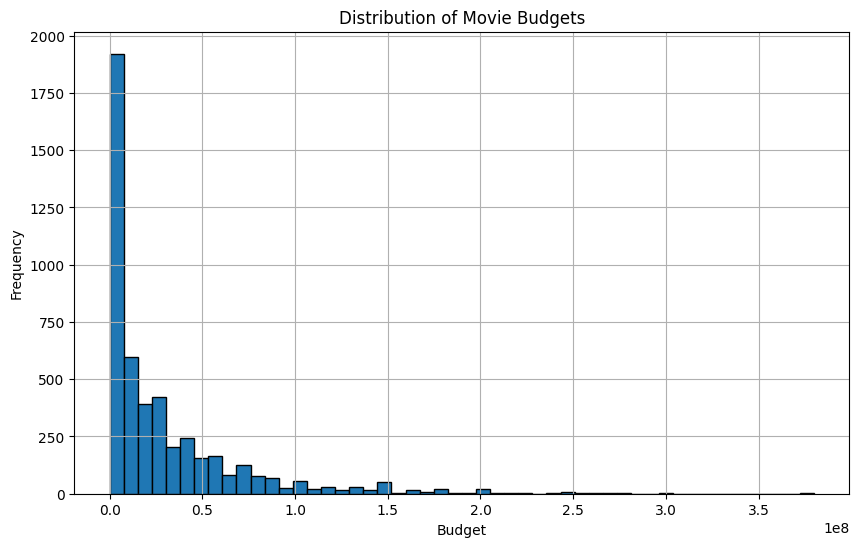

In [36]:
# Histogram of movie budgets
merged_df['budget'].plot(kind='hist', bins=50, figsize=(10, 6), edgecolor='black')
plt.title('Distribution of Movie Budgets')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


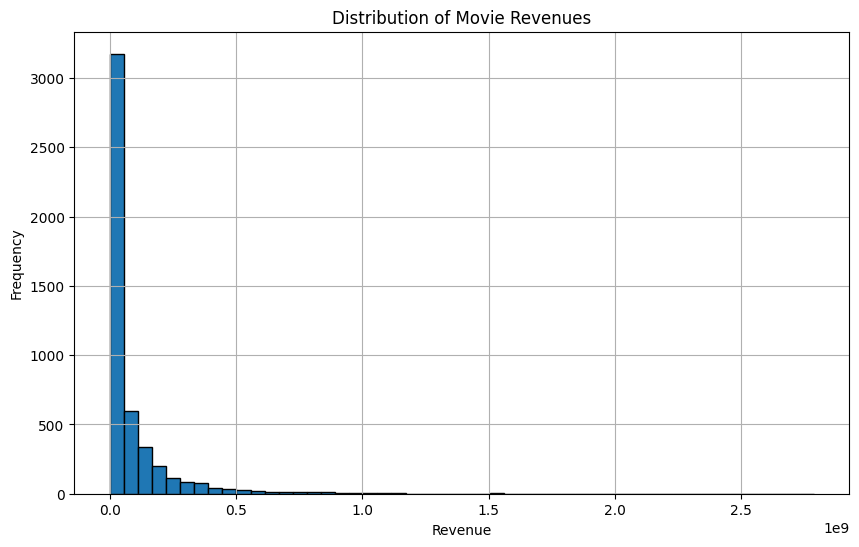

In [37]:
# Histogram of movie revenues
merged_df['revenue'].plot(kind='hist', bins=50, figsize=(10, 6), edgecolor='black')
plt.title('Distribution of Movie Revenues')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


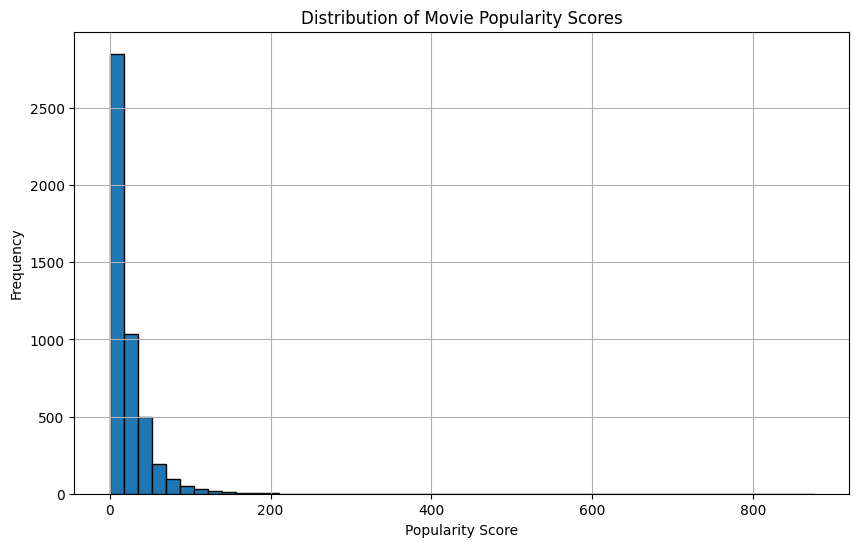

In [38]:
# Histogram of movie popularity scores
merged_df['popularity'].plot(kind='hist', bins=50, figsize=(10, 6), edgecolor='black')
plt.title('Distribution of Movie Popularity Scores')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


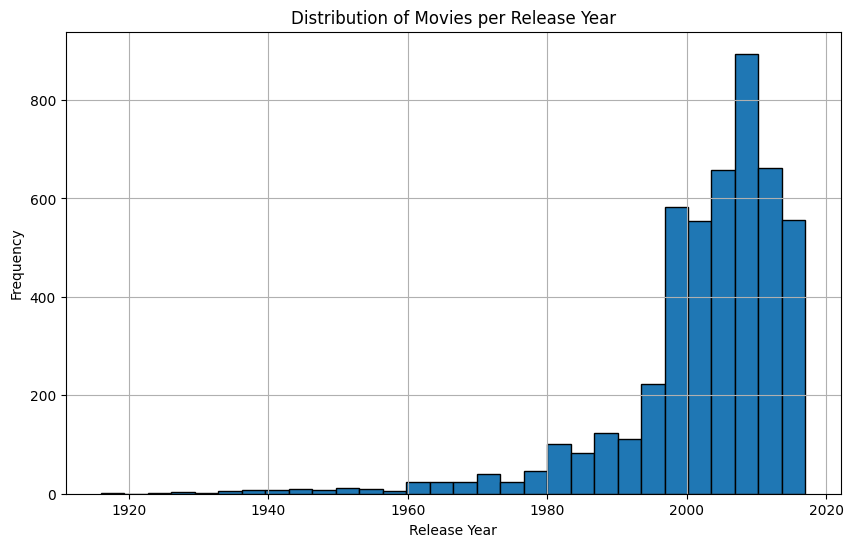

In [39]:
# Histogram of movie release years
merged_df['release_year'].plot(kind='hist', bins=30, figsize=(10, 6), edgecolor='black')
plt.title('Distribution of Movies per Release Year')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Step 1: explode the genres column

In [40]:
genre_df = merged_df.explode('genres')
# Display the head of the new DataFrame to verify
genre_df.head()

,budget,genres,id,original_language,original_title,overview,popularity,production_countries,revenue,runtime,spoken_languages,status,vote_average,vote_count,title,release_year
0,237000000,Action,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[United States of America, United Kingdom]",2787965087,162.0,"[English, Español]",Released,7.199219,11800,Avatar,2009
0,237000000,Adventure,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[United States of America, United Kingdom]",2787965087,162.0,"[English, Español]",Released,7.199219,11800,Avatar,2009
0,237000000,Fantasy,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[United States of America, United Kingdom]",2787965087,162.0,"[English, Español]",Released,7.199219,11800,Avatar,2009
0,237000000,Science Fiction,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[United States of America, United Kingdom]",2787965087,162.0,"[English, Español]",Released,7.199219,11800,Avatar,2009
1,300000000,Adventure,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,[United States of America],961000000,169.0,[English],Released,6.898438,4500,Pirates of the Caribbean: At World's End,2007


Step 2: Group by year and genre, and calculate the average popularity


In [41]:
genre_year_popularity = genre_df.groupby(['release_year', 'genres'])['popularity'].mean().reset_index()

# Display the result to verify
genre_year_popularity.head()

,release_year,genres,popularity
0,1916,Drama,3.232447
1,1925,Drama,0.785744
2,1925,Romance,0.785744
3,1925,War,0.785744
4,1927,Drama,32.351527


Step 3: Identify the most popular genre for each year

In [42]:
# Pivot the data to have years as rows and genres as columns with popularity as values
genre_pivot = genre_year_popularity.pivot(index='release_year', columns='genres', values='popularity')

For each year, find the genre with the highest popularity


In [43]:
most_popular_genres = genre_pivot.idxmax(axis=1).reset_index()
most_popular_genres.columns = ['release_year', 'most_popular_genre']
# Display the result
most_popular_genres

,release_year,most_popular_genre
0,1916,Drama
1,1925,Drama
2,1927,Drama
3,1929,Thriller
4,1930,Action
...,...,...
85,2013,Science Fiction
86,2014,Science Fiction
87,2015,Adventure
88,2016,Adventure


### Visualization for the first question

Plot the most popular genre for each year

Text(0.5, 0, 'distribution')

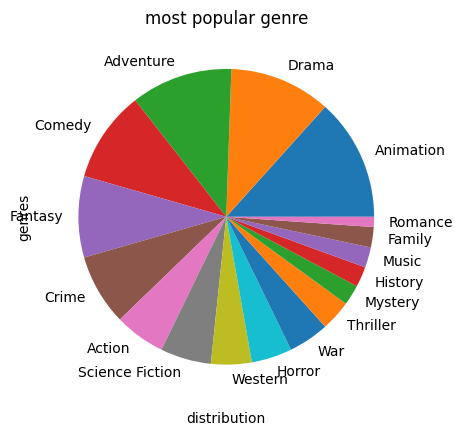

In [44]:
most_popular_genres['most_popular_genre'].value_counts().plot(kind = 'pie');
plt.title('most popular genre')
plt.ylabel('genres')
plt.xlabel('distribution')

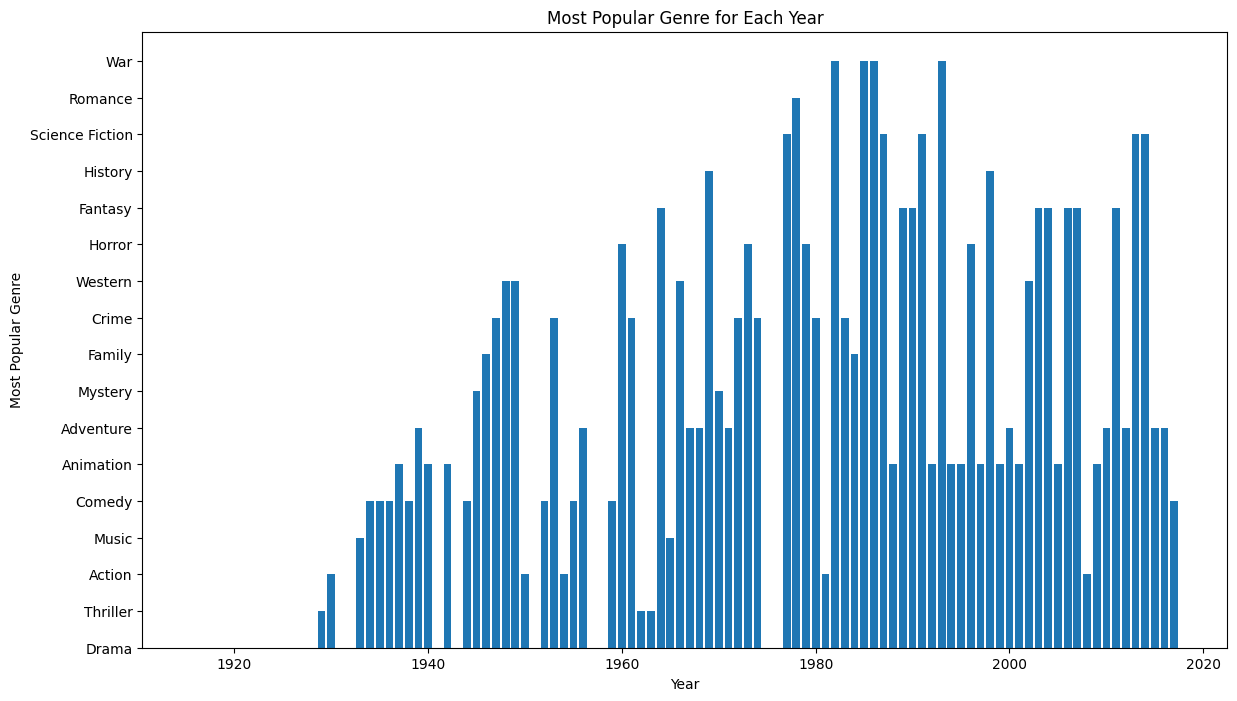

In [45]:
plt.figure(figsize=(14, 8))
plt.bar(most_popular_genres['release_year'], most_popular_genres['most_popular_genre'])
plt.title('Most Popular Genre for Each Year')
plt.xlabel('Year')
plt.ylabel('Most Popular Genre')
plt.show()

### We can also visualize the number of years every genre was the most popular

Count the occurrences of each genre as the most popular genre


In [46]:
genre_counts = most_popular_genres['most_popular_genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

plotting the data : 

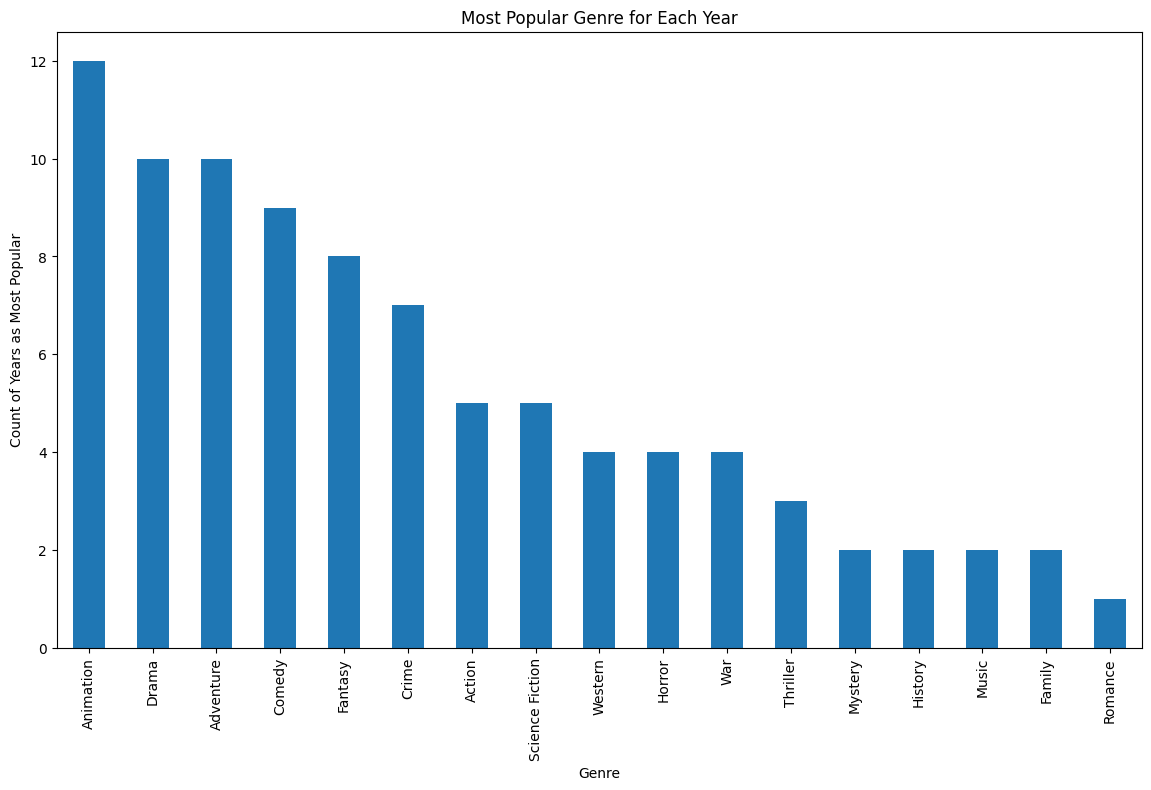

In [47]:
genre_counts.set_index('genre').plot(kind='bar', figsize=(14, 8), legend=False)
plt.title('Most Popular Genre for Each Year')
plt.xlabel('Genre')
plt.ylabel('Count of Years as Most Popular')
plt.show()

### Research Question 2: How does the budget of a movie relate to its revenue?


Scatter plot to visualize the relationship between budget and revenue

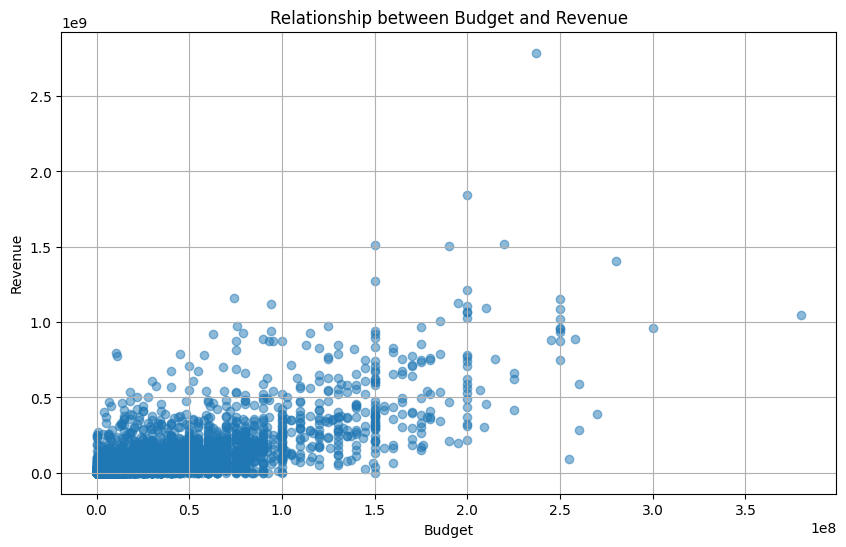

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['budget'], merged_df['revenue'], alpha=0.5)
plt.title('Relationship between Budget and Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

there appears to be a positive trend, meaning that generally as the budget increases the revenue also increase.However, this trend is not perfectly linear as there are points with high budgets and lower revernues and vice versa

### Research Question 3: What is the relationship between spoken languages and popularity?



to answer this question at first we need to calculate the average popularity of movies for each spoken languags


In [49]:
language_popularity = merged_df.explode('spoken_languages').groupby('spoken_languages')['popularity'].sum()

# Sort the languages by average popularity in descending order
language_popularity_sorted = language_popularity.sort_values(ascending=False)
language_popularity_sorted.head()

spoken_languages
English     100485.362384
Français     10175.231830
Español       8193.763940
Deutsch       6148.566668
Italiano      4735.943963
Name: popularity, dtype: float64

because we have 62 language spoken the plot showing the relation will be large so we will take the top 35 language only

In [50]:
# Select the top 30 most popular languages
top_35_languages = language_popularity_sorted.head(35)

we will draw the plot know

### IMPORTANT : for the plot below just scroll to the end so you can see the plot

/opt/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26222 (\N{CJK UNIFIED IDEOGRAPH-666E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36890 (\N{CJK UNIFIED IDEOGRAPH-901A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 35805 (\N{CJK UNIFIED IDEOGRAPH-8BDD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/venv/

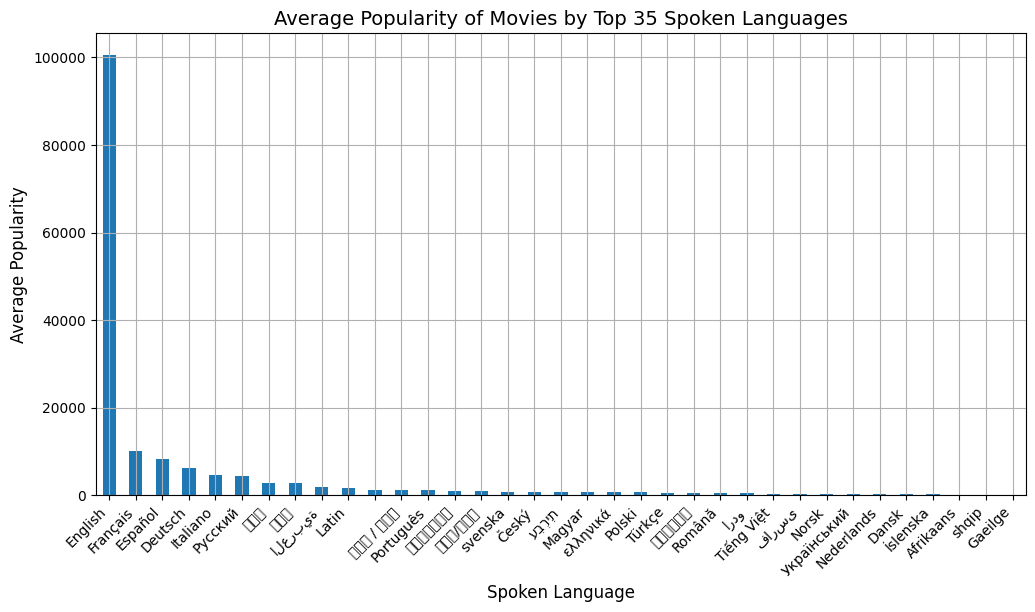

In [51]:
# Plot the bar
ax = top_35_languages.plot(kind='bar', figsize=(12, 6))

# Set title and labels
ax.set_title('Average Popularity of Movies by Top 35 Spoken Languages', fontsize=14)
ax.set_xlabel('Spoken Language', fontsize=12)
ax.set_ylabel('Average Popularity', fontsize=12)

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

# Add grid lines for better readability
ax.grid(True)

plt.show()


we can notice that english is not the sploken language in top popular movies

In [52]:
# Find the rank of 'English'
english_rank = language_popularity_sorted.index.get_loc('English') + 1

english_rank

1

<a id='conclusions'></a>
## Conclusions


In this analysis, we explored several research questions to understand the factors influencing movie revenue and popularity. Our key findings are summarized below:

### Summary of Findings
- **Popularity of Genres Over the Years**: The analysis revealed that some genres consistently remain popular over the years, while others fluctuate in popularity. By examining the most popular genres over time, we observed shifts in audience preferences. For instance, the popularity of Animation and drama genres has remained strong in recent years, while genres like war and music have seen fluctuations. This indicates changing trends in audience tastes and industry focus.
- **Relationship between Budget and Revenue**:We found a positive correlation between a movie's budget and its revenue, indicating that higher-budget films tend to generate more revenue. This aligns with the understanding that larger budgets often allow for better production quality and star power.
- **Relationship Between Spoken Languages and Popularity**: Analyzing the relationship between spoken languages and movie popularity, we identified that movies in languages such as English, Spanish, and French tend to have higher average popularity. This may be attributed to the larger audience base for these languages. Interestingly, languages with fewer movies in the dataset, such as Afrikaans and  فارسي, showed higher average popularity, suggesting that niche markets can also drive significant popularity.

### Limitations
- Omission of Key Variables: The dataset does not account for other significant factors such as marketing spend, release timing, and international box office performance, which can also impact a movie's revenue and popularity. Including these variables in future analyses could provide a more comprehensive understanding of the factors driving movie success.

- The data cleaning process involved dropping rows with missing values, which could introduce bias if the missing data is not random.

### Future Work
- A deeper analysis could include examining the impact of cast and crew on movie revenues and popularity.
- Incorporate external data sources for a more comprehensive analysis, such as marketing spend and international box office data.
- Explore the impact of multilingual movies and how the combination of spoken languages affects popularity and revenue.


In [53]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 8 image(s).
[NbConvertApp] Writing 794016 bytes to Investigate_a_Dataset.html
